Feito por Beatriz Nicolau Silva (11202320386)



---



**TRABALHO FINAL DE BASES COMPUTACIONAIS DA CIÊNCIA - PROFESSORA CARLA NEGRI**

Em 2010, foi realizado pelo IBGE o XII Censo Demográfico, que retrata de forma extensa a profundidade da população brasileira e suas características socioeconômicas, a fim de servir de base para o planejamento público dos anos seguintes da próxima década. É sobre ele que deveriam se debruçar os planos de governo e as políticas sociais de cada localidade. Armazenados em tabelas, seus dados são abrangentes e de suma importância. Por isso, pensando numa análise visual das pesquisas e resultados, o trabalho a seguir compreende as informações principalmente em forma de gráficos.

In [ ]:
#Importando bibliotecas necessárias
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#Lendo as planilhas a serem analisadas
agua_df = pd.read_csv("agua_2010.csv", sep=";")
instrucao_df = pd.read_csv("nivel_instrucao_2010.csv", sep=";")
ocupacao_df = pd.read_csv("ocupacao_2010.csv", sep=";")
residente_df = pd.read_csv("pop_residente_2010.csv", sep=";")
renda_df = pd.read_csv("renda_2010.csv", sep=";")

In [ ]:
residente_df.columns

Index(['Estado', 'Município', 'Total Residente', 'Residente Brasileira',
       'Brasileira Nata', 'Brasileira por naturalização',
       'Residente Estrangeira', 'Código da Unidade Geográfica'],
      dtype='object')

Tendo em vista a história do Brasil e construção cultural do país, o primeiro ponto que norteia a análise de sua população é o tipo de residência das pessoas,se nasceram em território brasileiro, se vieram de outros países e se naturalizaram ou se são extrangeiros que residem no Brasil. Esses dados refletem não somente na proporção de políticas públicas e serviços por fração da população como também na reflexão sobre o processo de imigração para o Brasil e como os países são receptivos ou não em suas tradições e acomodações para estrangeiros.

<Axes: title={'center': 'Total de Residentes por Estado'}, xlabel='Estado'>

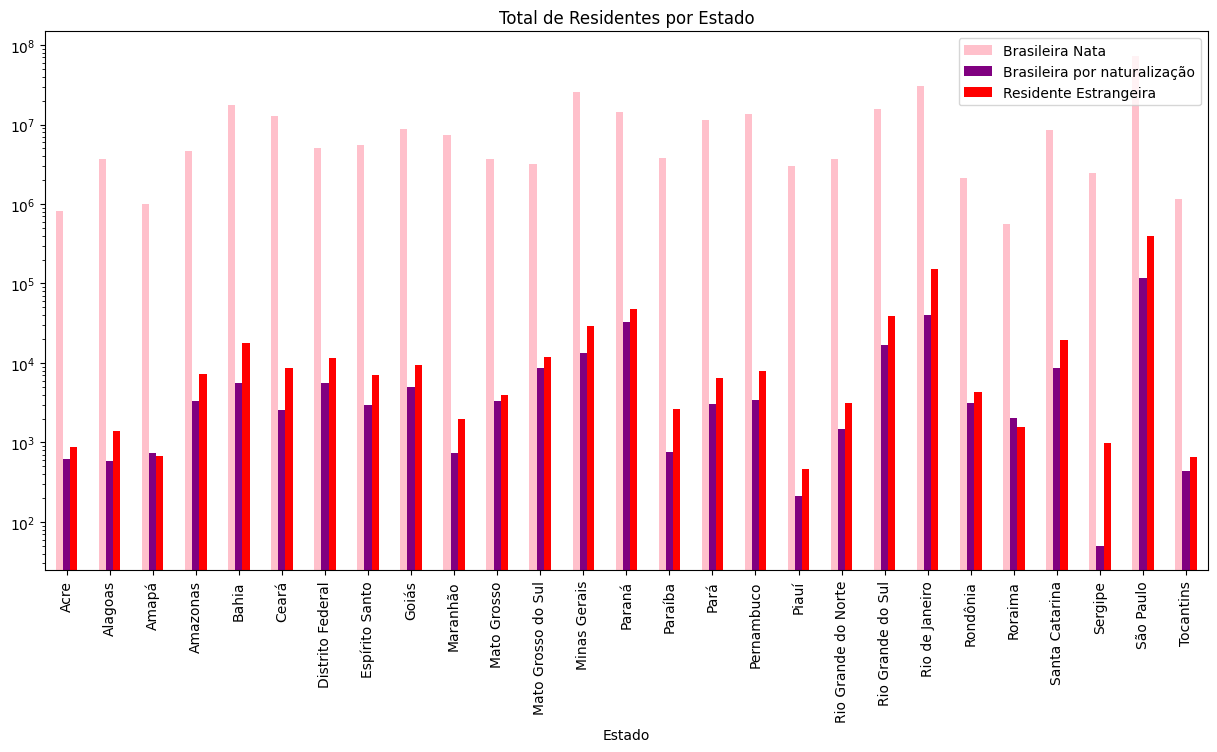

In [ ]:
residente_agrupado = residente_df.groupby("Estado").agg("sum")
residente_agrupado.plot(y=["Brasileira Nata", "Brasileira por naturalização", "Residente Estrangeira"],
                      kind="bar", logy=True, figsize=(15,7), color=["pink", "purple", "red"], title="Total de Residentes por Estado")

Num paronama geral de estados brasileiros, é possível compreender que a grande maioria da população em todos eles é de brasileitos natos. No entanto, a proximidade geral entre residentes estrangeiros e brasileiros naturalizados sugere incentivo a permanência no país e possivelmente indica que os processos para ser considerado brasileiro não são distantes e inacessíveis. Um caso diferente é o do estado de Sergipe, que encontra grande diferença entre o número de naturalizados e estrangeiros, colocando em questionamento as condições dos serviços no estado, incentivo à permanência e razões para que isso ocorra.



---



array([[<Axes: title={'center': 'Residente (log10)'}>]], dtype=object)

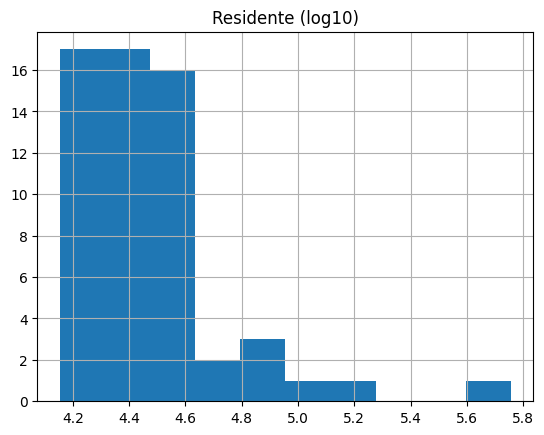

In [ ]:
residente_df['Residente (log10)'] = np.log10(residente_df['Total Residente'])
condicao_res = residente_df["Estado"] == "Sergipe"
residente_df[condicao_res].hist("Residente (log10)")



---



Com a grande quantidade de residentes no estado, a demanda por estrutura e acesso à serviços aumenta, o que indica necessidade de que se haja adequação do governo para administrar recursos a fim de atender a população. Um dos recursos essenciais para que se haja a manutenção da vida e que se desenvolva uma civilização é o acesso a água.

In [ ]:
agua_df.columns

Index(['Estado', 'Município', 'Total domicílios', 'Total com água canalizada',
       'Água em pelo menos um cômodo', 'Rede geral de distribuição',
       'Outra forma', 'Água no terreno ou propriedade',
       'Rede geral de distribuição.1', 'Outra forma.1', 'Não tinham',
       'Código da Unidade Geográfica'],
      dtype='object')

<Axes: title={'center': 'Domicílios com Água Canalizada'}, xlabel='Estado'>

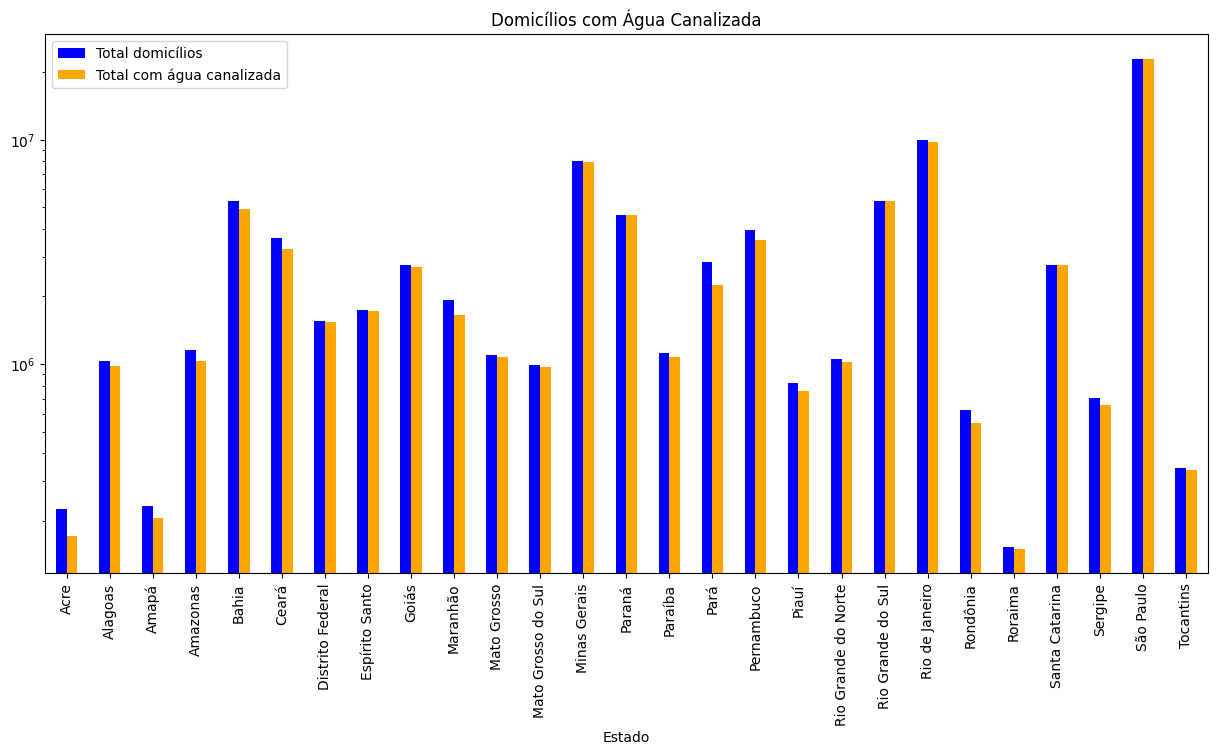

In [ ]:
agua_agrupado = agua_df.groupby("Estado").agg("sum")
agua_agrupado.plot(y=["Total domicílios", "Total com água canalizada"],
                      kind="bar", logy=True, figsize=(15,7), color=["blue", "orange"], title="Domicílios com Água Canalizada")

No gráfico acima, é possível observar a relação entre o total de domicílios e aqueles que são atendidos com serviços de água canalizada nos estados.

Tendo em vista a diferença entre a quantidade de domicílios, vamos observar aqueles que possuem menores quantidades e que, por consequência, deveriam ter menores índices de falta d'água.

<Axes: title={'center': 'Domicílios com Água Canalizada'}, xlabel='Estado'>

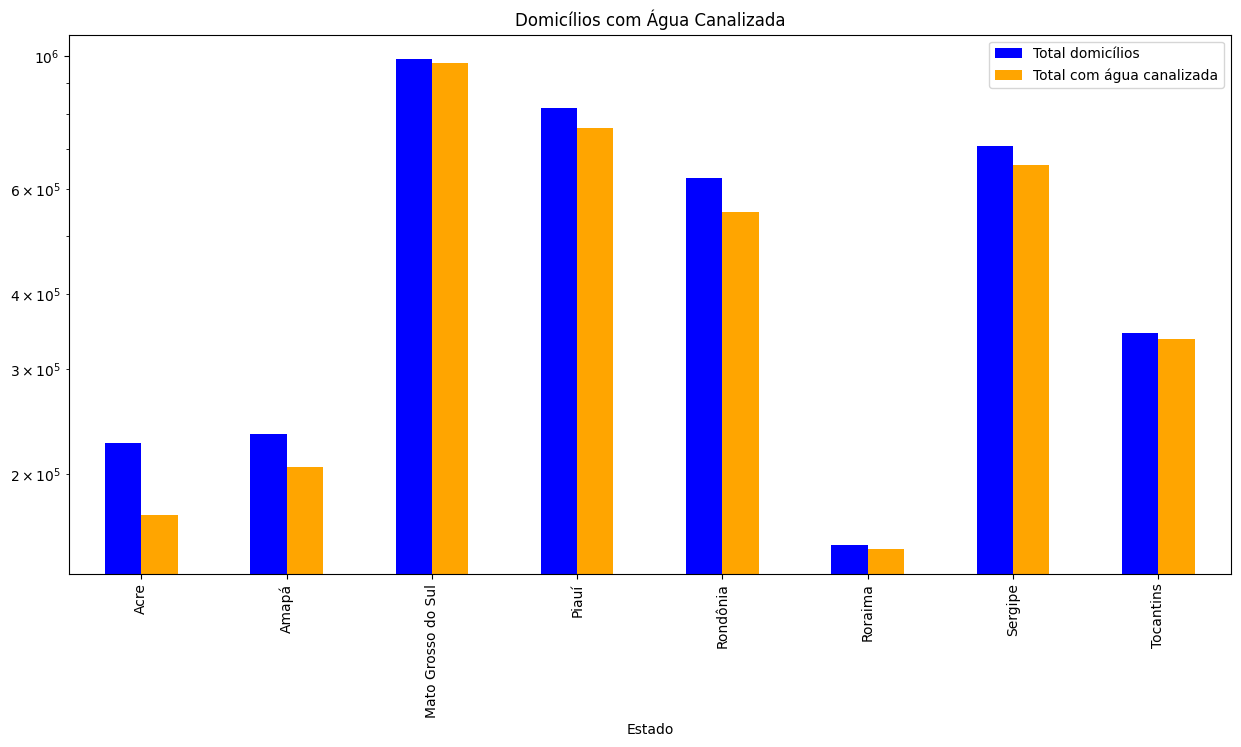

In [ ]:
condicao_agua = agua_agrupado["Total domicílios"] < 10**6

agua_agrupado[condicao_agua].plot(y=["Total domicílios", "Total com água canalizada"],
                      kind="bar", logy=True, figsize=(15,7), color=["blue", "orange"], title="Domicílios com Água Canalizada")


No gráfico, observa-se que o Acre é o estado, dentre os de menores quantidades de residências, que mais precisa adaptar suas políticas e infraestruturas para que se atinja o pleno acesso da população aos recursos hídricos. Nesse estado, assim como na grande maioria dos demais, existem ao menos dois tipos de abastecimento de água: rede geral ou por outra forma, veja no gráfico a seguir:

,Estado,Município,Total domicílios,Total com água canalizada,Água em pelo menos um cômodo,Rede geral de distribuição,Outra forma,Água no terreno ou propriedade,Rede geral de distribuição.1,Outra forma.1,Não tinham,Código da Unidade Geográfica
65,Acre,Cruzeiro do Sul,18573,12232,9538,7137,2401,2694,2238,457,6341,1.200203e+06
66,Acre,Área 001,4528,3648,2957,2372,586,691,654,37,880,1.200203e+12
67,Acre,Área 002,6907,4854,3974,2577,1397,880,598,281,2053,1.200203e+12
68,Acre,Área 003,7138,3730,2607,2188,418,1124,985,139,3408,1.200203e+12
69,Acre,Rio Branco,94184,73260,64411,41458,22953,8849,6710,2139,20924,1.200401e+06
70,Acre,Área 001,7395,4535,3839,1725,2113,697,486,211,2860,1.200401e+12
71,Acre,Área 002,11319,9861,9007,5380,3627,854,664,191,1458,1.200401e+12
72,Acre,Área 003,16237,14892,12504,11497,1007,2387,2111,277,1346,1.200401e+12
73,Acre,Área 004,15996,13066,11999,5889,6110,1067,489,578,2930,1.200401e+12
74,Acre,Área 005,13146,11771,10442,8635,1807,1329,1114,214,1376,1.200401e+12


<Axes: title={'center': 'Formas de Distribuição no Acre'}, xlabel='Município'>

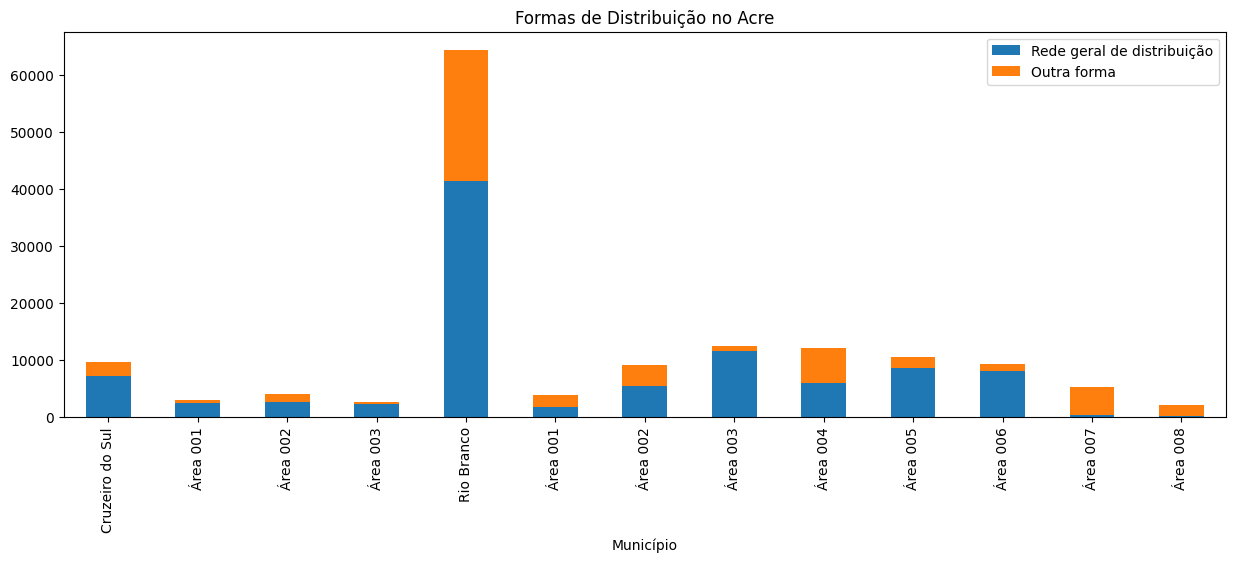

In [ ]:
condicao = agua_df["Estado"] == "Acre"
display(agua_df[condicao])
agua_df[condicao].plot(x="Município", y=["Rede geral de distribuição", "Outra forma"],
                    kind="bar", stacked=True, figsize=(15,5), title="Formas de Distribuição no Acre")



---



A água e o acesso pleno a ela são imprescindíveis para que as atividades econômicas e sociais se perpetuem. No próximo gráfico é possível observar, por exemplo, que os estados com mais acesso à água do que o Acre possuem diferenças menores entre a população com ensino fundamental completo do que este mesmo estado.

In [ ]:
instrucao_df.columns

Index(['Estado', 'Município', 'Total pessoas > 10 anos',
       'Sem instrução e fundamental incompleto',
       'Fundamental completo e médio incompleto',
       'Médio completo e superior incompleto', 'Superior completo',
       'Não determinado', 'Código da Unidade Geográfica'],
      dtype='object')

<Axes: title={'center': 'Nível de Instrução por Estado'}, xlabel='Estado'>

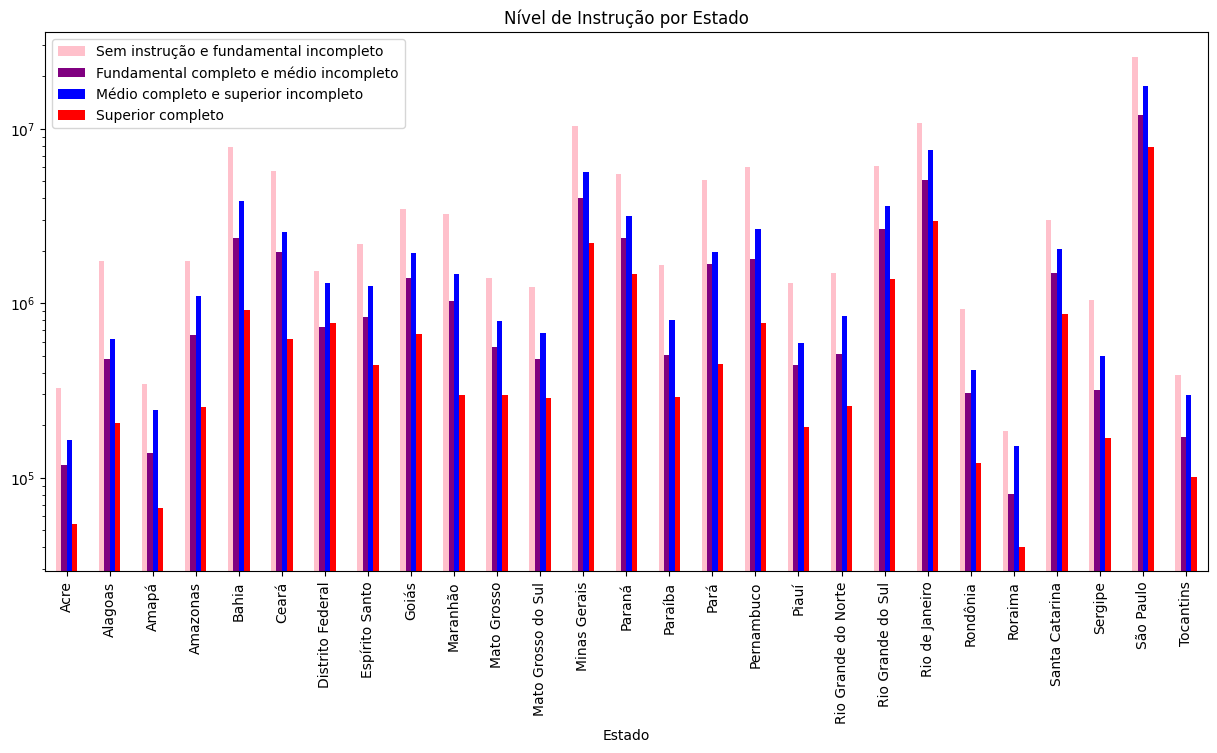

In [ ]:
instrucao_agrupado = instrucao_df.groupby("Estado").agg("sum")
instrucao_agrupado.plot(y=["Sem instrução e fundamental incompleto", "Fundamental completo e médio incompleto", "Médio completo e superior incompleto", "Superior completo"],
                      kind="bar", logy=True, figsize=(15,7), color=["pink", "purple", "blue", "red"], title="Nível de Instrução por Estado")

Uma vez que não há acesso ou há defasagem em serviços de qualificação e instrução, o impacto ocorre, sobretudo com o avanço do mercado de trabalho, no número de pessoas desocupadas, sem emprego e sem participação ativa no mercado.

<Axes: title={'center': 'Ocupação'}, xlabel='Estado'>

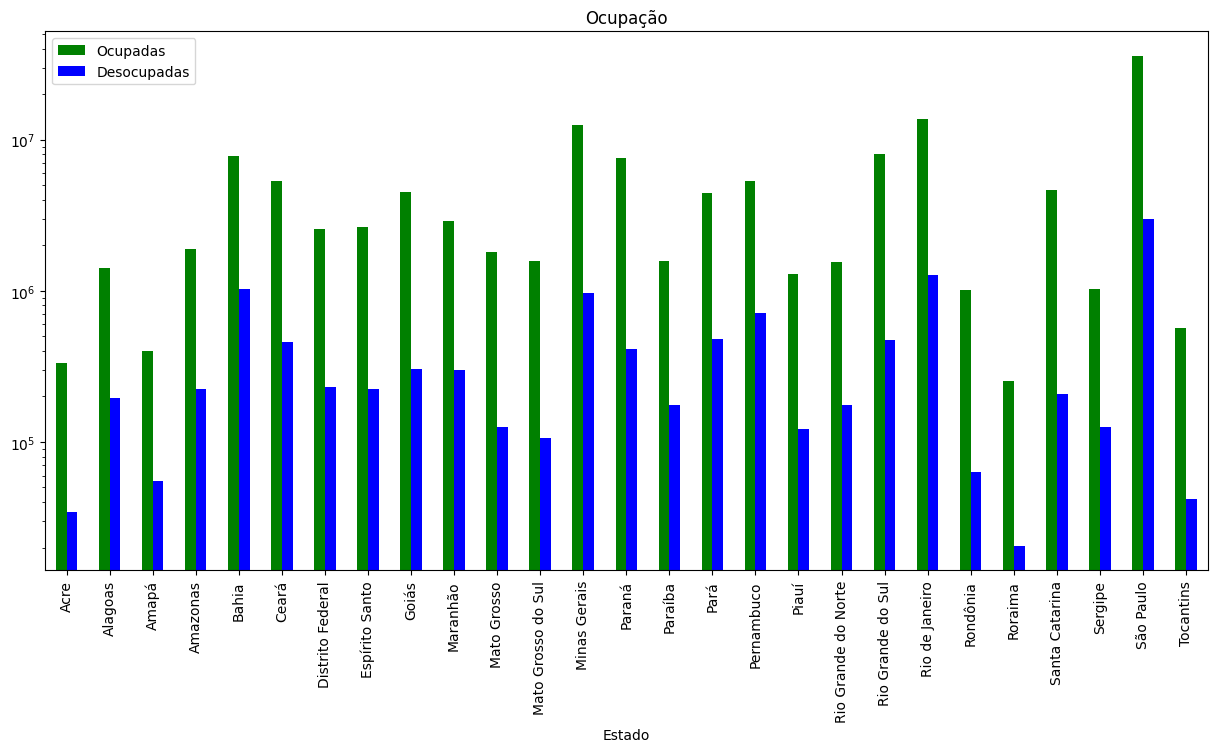

In [ ]:
ocupacao_agrupado = ocupacao_df.groupby("Estado").agg("sum")
ocupacao_agrupado.plot(y=["Ocupadas", "Desocupadas"],
                      kind="bar", logy=True, figsize=(15,7), color=["green", "blue"], title="Ocupação")

In [ ]:
renda_df.columns


Index(['Estado', 'Município', 'Total pessoas > 10 anos', 'Até 1 SM',
       'De 1 a 2 SM', 'De 2 a 3 SM', 'De 3 a 5 SM', 'De 5 a 10 SM',
       'De 10 a 20 SM', 'Mais de 20 SM', 'Sem rendimento',
       'Código da Unidade Geográfica'],
      dtype='object')

Por sua vez, uma grande taa de desocupados afeta fortemente a renda da população, que perpetua o ciclo da desigualdade, aumentando-a cada vez mais.

<Axes: title={'center': 'Renda'}, xlabel='Estado'>

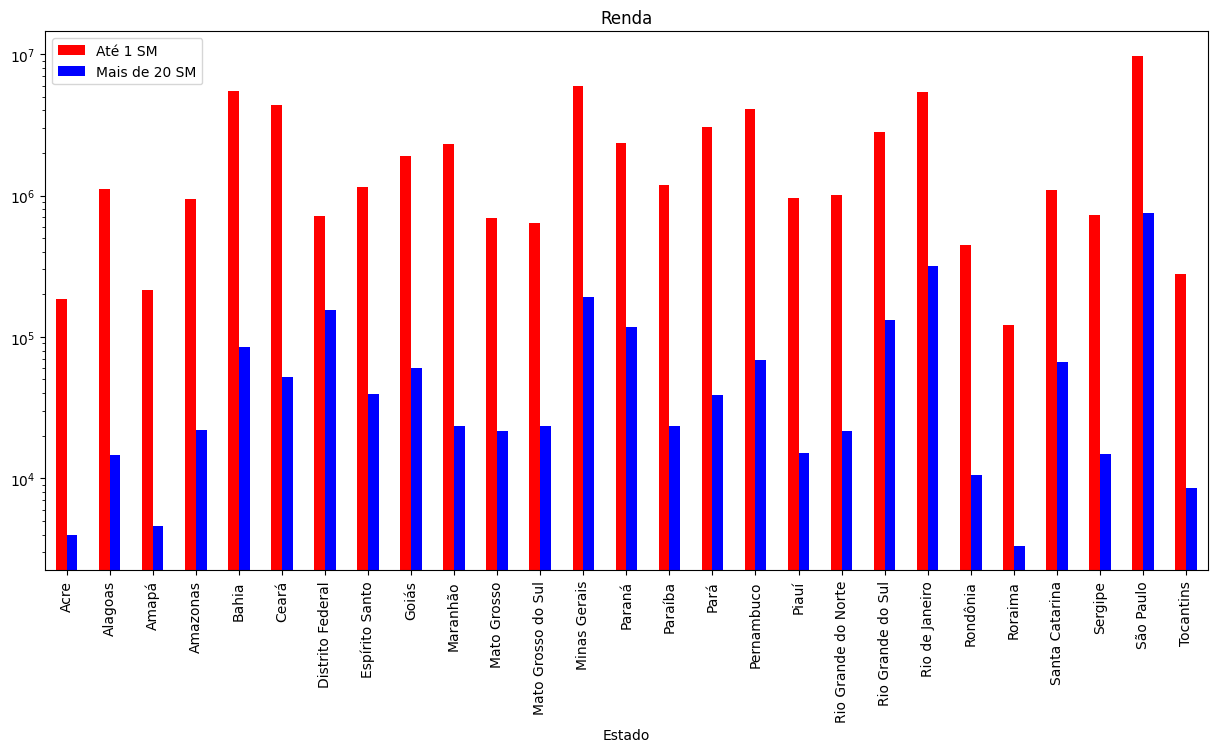

In [ ]:
renda_agrupado = renda_df.groupby("Estado").agg("sum")
renda_agrupado.plot(y=["Até 1 SM", "Mais de 20 SM"],
                      kind="bar", logy=True, figsize=(15,7), color=["red", "blue"], title="Renda")